In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from models.modeling import VisionTransformer, CONFIGS

import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from collections import defaultdict

import torch.nn as nn
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from PIL import Image
from tqdm import tqdm

c:\Users\Csongi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Csongi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral', 7: 'Contempt'}
emotion_colors = ['#F28D8C', '#A8D08D', '#D9A8A1', '#FFEB99', '#A2C9E9', '#D3A1C3', '#D4F1C5', '#C1A1D0']

In [3]:
data_src_folder = "C:\\BME\\7_felev\\szakdoli\\dataset\\FER2013Plus\\numpy_data"

train_images = np.load(os.path.join(data_src_folder, 'train_images.npy'))
train_labels = np.load(os.path.join(data_src_folder, 'train_labels.npy'))

val_images = np.load(os.path.join(data_src_folder, 'val_images.npy'))
val_labels = np.load(os.path.join(data_src_folder, 'val_labels.npy'))

test_images = np.load(os.path.join(data_src_folder, 'test_images.npy'))
test_labels = np.load(os.path.join(data_src_folder, 'test_labels.npy'))

print(f"train_images shape: {train_images.shape}, train_labels shape: {train_labels.shape}")
print(f"train_images shape: {val_images.shape}, train_labels shape: {val_labels.shape}")
print(f"train_images shape: {test_images.shape}, train_labels shape: {test_labels.shape}")

train_images shape: (28389, 48, 48), train_labels shape: (28389, 8)
train_images shape: (3546, 48, 48), train_labels shape: (3546, 8)
train_images shape: (3553, 48, 48), train_labels shape: (3553, 8)


In [4]:
emotions[np.argmax(train_labels[0])]

'Neutral'

### Plotting image that's not in FERP but is in FER

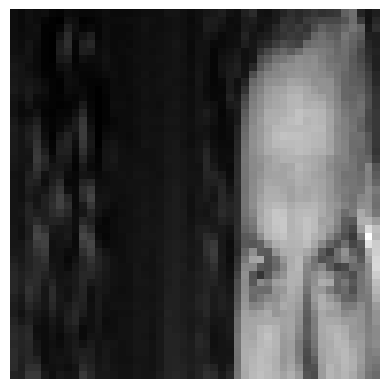

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_image_from_csv(file_path, row_index):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    
    pixel_data = data[row_index][1]
    pixels = np.array(list(map(int, pixel_data.split())), dtype=np.uint8).reshape(48, 48)
    
    plt.imshow(pixels, cmap = 'gray')
    plt.axis('off')
    plt.show()

file_path = "C:\\BME\\7_felev\\szakdoli\\dataset\\FER2013Plus\\csvs\\fer2013.csv"
row_index = 32300 # 35884, 18, 24, 32300
plot_image_from_csv(file_path, row_index)

### Plotting distributions

In [72]:
def plot_bar_chart(labels, emotions, colors, x_label, y_label, title):
    emotion_frequencies = [0] * len(emotions)
    for label in labels:
        emotion_index = np.argmax(label)
        emotion_frequencies[emotion_index] += 1
    
    emotion_names = [emotions[i] for i in range(len(emotions))]
    
    plt.bar(emotion_names, emotion_frequencies, color=colors, edgecolor='black')
    
    for i, count in enumerate(emotion_frequencies):
        plt.text(i, count + 5, f"{count}", ha='center', va='bottom')
    
    plt.xticks(rotation=15, ha='right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

In [73]:
def pct_fun(pct, allvals):
    if pct < 5:
        return ""
    else:
        return f"{pct:.1f}%"

def plot_pie_chart(labels, emotions, colors, title):
    emotion_frequencies = [0] * len(emotions)
    for label in labels:
        emotion_index = np.argmax(label)
        emotion_frequencies[emotion_index] += 1
    
    emotion_frequencies = np.array(emotion_frequencies)
    
    emotion_frequencies_percent = (emotion_frequencies / len(labels)) * 100
    
    emotion_names = [emotions[i] for i in range(len(emotions))]
    
    plt.pie(x=emotion_frequencies_percent, labels=emotion_names, colors=colors, autopct=lambda pct: pct_fun(pct, emotion_frequencies_percent),
            wedgeprops={'edgecolor': 'black'})
    
    plt.title(title)
    
    plt.axis('equal')
    plt.show()
        

#### Entire dataset

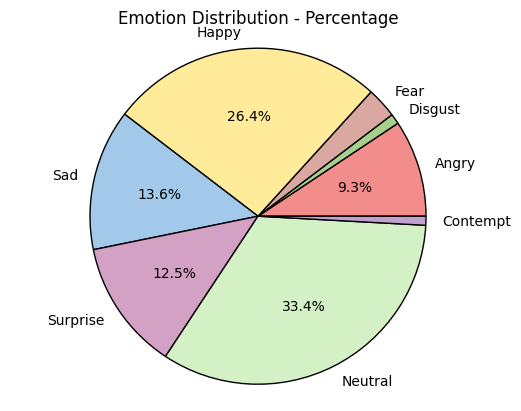

In [74]:
labels = np.concatenate([train_labels, val_labels, test_labels])
plot_pie_chart(labels, emotions, emotion_colors, "Emotion Distribution - Percentage")

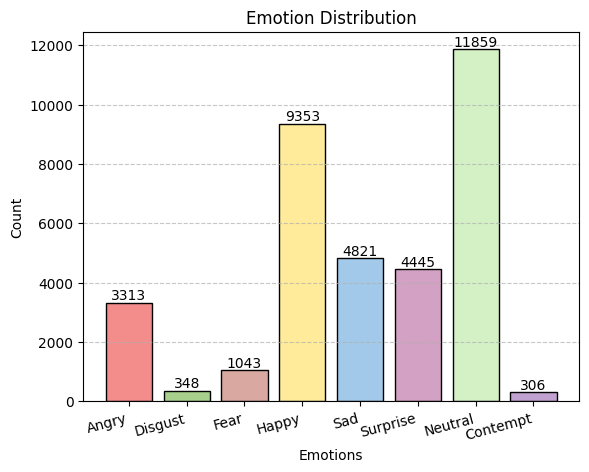

In [75]:
labels = np.concatenate([train_labels, val_labels, test_labels])
plot_bar_chart(labels, emotions, emotion_colors, "Emotions", "Count", "Emotion Distribution")

#### Separately for train, test and val

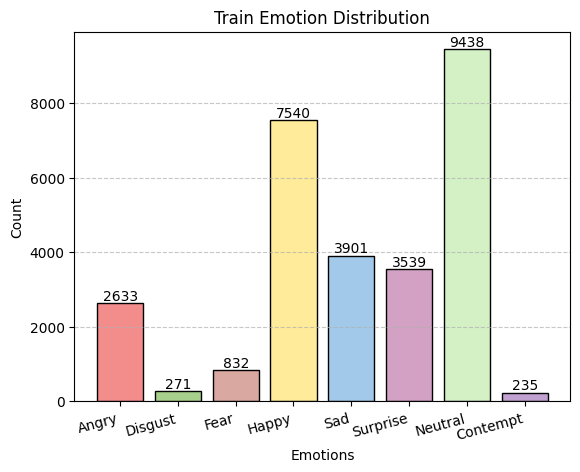

In [76]:
plot_bar_chart(train_labels, emotions, emotion_colors, "Emotions", "Count", "Train Emotion Distribution")

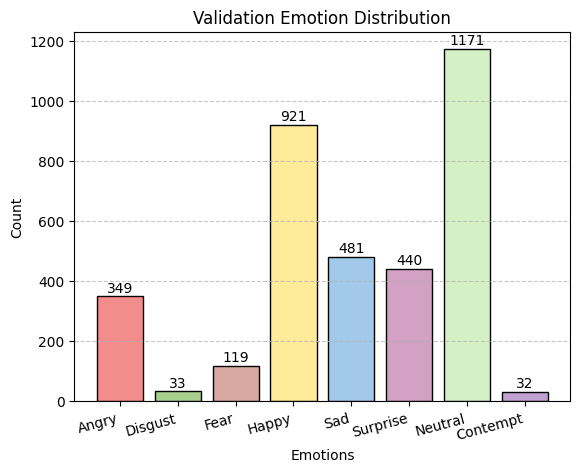

In [77]:
plot_bar_chart(val_labels, emotions, emotion_colors, "Emotions", "Count", "Validation Emotion Distribution")

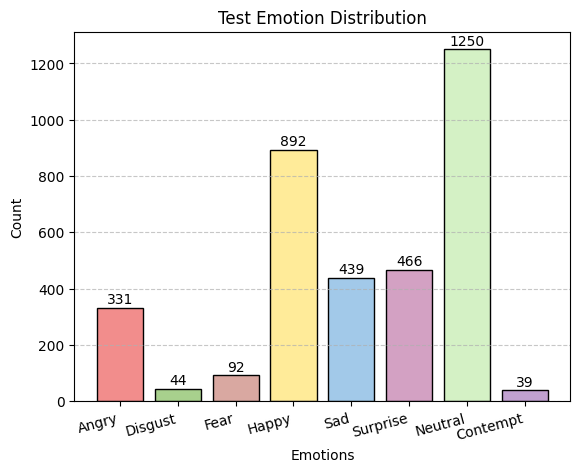

In [78]:
plot_bar_chart(test_labels, emotions, emotion_colors, "Emotions", "Count", "Test Emotion Distribution")